API key = GWBV99W14FKY1II8

In [253]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import json
from urllib.request import urlopen
import seaborn as sns

In [254]:
key = 'GWBV99W14FKY1II8'
req = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=GWBV99W14FKY1II8')
result =req.json()

In [255]:
result

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2022-03-23',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2022-03-23': {'1. open': '300.5100',
   '2. high': '303.2300',
   '3. low': '297.7201',
   '4. close': '299.4900',
   '5. volume': '25715377'},
  '2022-03-22': {'1. open': '299.8000',
   '2. high': '305.0000',
   '3. low': '298.7700',
   '4. close': '304.0600',
   '5. volume': '27441386'},
  '2022-03-21': {'1. open': '298.8900',
   '2. high': '300.1400',
   '3. low': '294.9000',
   '4. close': '299.1600',
   '5. volume': '28107855'},
  '2022-03-18': {'1. open': '295.3700',
   '2. high': '301.0000',
   '3. low': '292.7300',
   '4. close': '300.4300',
   '5. volume': '42195837'},
  '2022-03-17': {'1. open': '293.2900',
   '2. high': '295.6100',
   '3. low': '289.3700',
   '4. close': '295.2200',
   '5. volume': '30816633'},
  '2022-03-16': {'1. open': '289

In [256]:
data = result.get('Time Series (Daily)')

In [257]:
type(data)

dict

In [258]:
data
df =pd.DataFrame(data)
df


,2022-03-23,2022-03-22,2022-03-21,2022-03-18,2022-03-17,2022-03-16,2022-03-15,2022-03-14,2022-03-11,2022-03-10,...,2021-11-11,2021-11-10,2021-11-09,2021-11-08,2021-11-05,2021-11-04,2021-11-03,2021-11-02,2021-11-01,2021-10-29
1. open,300.5100,299.8000,298.8900,295.3700,293.2900,289.1100,280.3500,280.3400,287.9600,283.0200,...,331.2500,334.5700,337.1071,337.3000,338.5100,332.8900,333.9000,330.3100,331.3550,324.1300
2. high,303.2300,305.0000,300.1400,301.0000,295.6100,294.5700,287.8200,285.3992,289.5100,286.6000,...,333.7746,334.6303,338.7200,337.6500,338.7900,336.5400,334.9000,333.4500,331.4900,332.0000
3. low,297.7201,298.7700,294.9000,292.7300,289.3700,283.2000,278.7250,275.8200,279.4300,280.5800,...,330.5100,329.9200,334.5300,334.4400,334.4217,329.5100,330.6500,330.0000,326.3700,323.9000
4. close,299.4900,304.0600,299.1600,300.4300,295.2200,294.3900,287.1500,276.4400,280.0700,285.5900,...,332.4300,330.8000,335.9500,336.9900,336.0600,336.4400,334.0000,333.1300,329.3700,331.6200
5. volume,25715377,27441386,28107855,42195837,30816633,37826329,34245085,30660747,27209330,30628012,...,16849844,25500938,19890003,20897001,22570098,23992202,21500082,25719044,26840400,34765982


In [259]:
#Dataframe will look better if we transpose
dft =df.T
dftr= dft.reset_index()
dftr = dftr.sort_values(["index"])
dftr = dftr.set_index(['index'])
dftr = dftr.astype(float)
dftr

,1. open,2. high,3. low,4. close,5. volume
index,,,,,
2021-10-29,324.130,332.00,323.9000,331.62,34765982.0
2021-11-01,331.355,331.49,326.3700,329.37,26840400.0
2021-11-02,330.310,333.45,330.0000,333.13,25719044.0
2021-11-03,333.900,334.90,330.6500,334.00,21500082.0
2021-11-04,332.890,336.54,329.5100,336.44,23992202.0
...,...,...,...,...,...
2022-03-17,293.290,295.61,289.3700,295.22,30816633.0
2022-03-18,295.370,301.00,292.7300,300.43,42195837.0
2022-03-21,298.890,300.14,294.9000,299.16,28107855.0


In [260]:
dftr.rename(columns={"1. open" : "Open", "2. high" : "High", "3. low" : "Low", "4. close" : "Close", "5. volume" : "Volume"}, inplace=True)
dftr.style.format({"Open" : '{:.6}', "High" : '{:.6}', "Low" : '{:.6}', "Close" : '{:.6}'})

dftr.style.set_properties(**{'background-color' : 'pink', 'color' : 'blue', 'border-color' : 'black', 'border-width' : '1px', 'border-style' : 'solid'})


,Open,High,Low,Close,Volume
index,,,,,
2021-10-29,324.130000,332.000000,323.900000,331.620000,34765982.000000
2021-11-01,331.355000,331.490000,326.370000,329.370000,26840400.000000
2021-11-02,330.310000,333.450000,330.000000,333.130000,25719044.000000
2021-11-03,333.900000,334.900000,330.650000,334.000000,21500082.000000
2021-11-04,332.890000,336.540000,329.510000,336.440000,23992202.000000
2021-11-05,338.510000,338.790000,334.421700,336.060000,22570098.000000
2021-11-08,337.300000,337.650000,334.440000,336.990000,20897001.000000
2021-11-09,337.107100,338.720000,334.530000,335.950000,19890003.000000
2021-11-10,334.570000,334.630300,329.920000,330.800000,25500938.000000


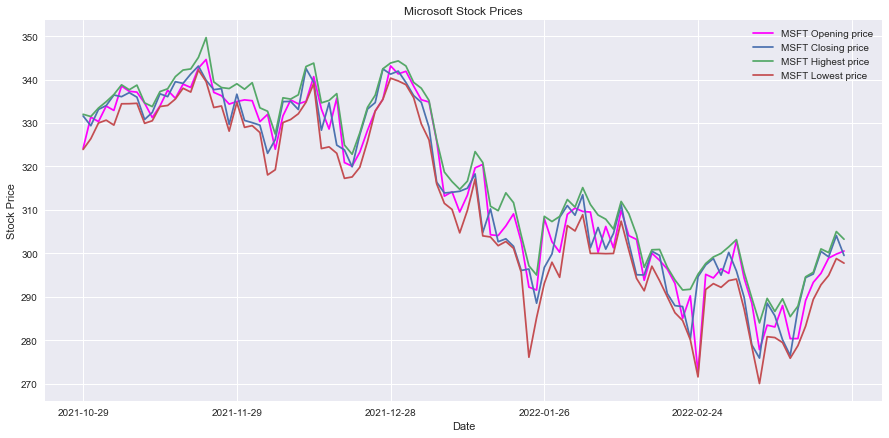

In [261]:
dftr['Open'].plot(label = 'MSFT Opening price',color = 'magenta', figsize=(15,7))
dftr['Close'].plot(label = 'MSFT Closing price')
dftr['High'].plot(label = 'MSFT Highest price')
dftr['Low'].plot(label = 'MSFT Lowest price')
plt.legend()
plt.title('Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


From the Data layed out in the graph above it's clear that there is a correlation between all the prices. This indicates that the stock isn't volatile on a daily basis - e.g Nobig discrepancies between lowest/highest prices throughout the day. What it does show is that the stock price was quite high towards the end of 2021 but has taken a turn since the turn of the year. However things seen to be picking up since late February 2022.

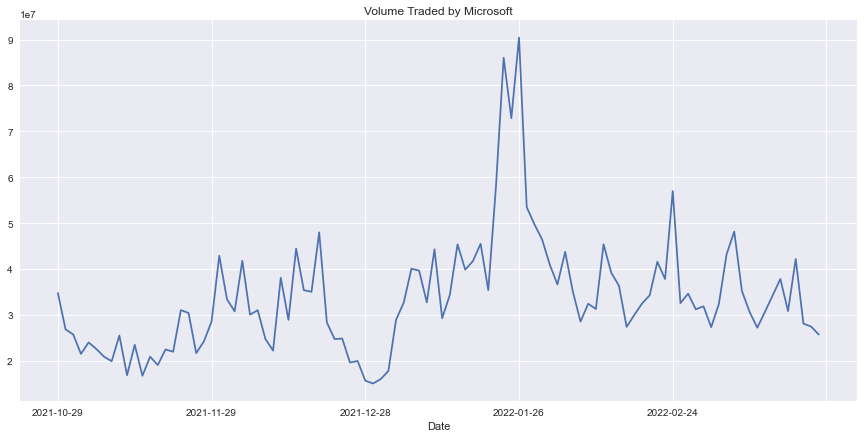

In [262]:
dftr['Volume'].plot( figsize=(15,7))
plt.title("Volume Traded by Microsoft")
plt.xlabel('Date')
plt.show()

Obviously the big take away here is that there was a big spike in the volumes traded by Microsoft in Late January. This is interesting as when we refer back to the pricing graph, there seems to be a negative correlation in this instance between the stock price and the volumes traded. i.e a drop in the stock price seemed to lead to more volumes being traded